>**Objectives**
* Who the most important characters are
* How their importance evolves over time
* Main communities of characters that form this social network

In [1]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import networkx as nx
from pyvis.network import Network
import community as community_louvain
import matplotlib.pyplot as plt

import os
import re

import Functionalities

In [2]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.2 kB/s eta 0:00:00m eta 0:00:010:00:09
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English language model
NER = spacy.load("en_core_web_sm")

In [4]:
# Get all the book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '1 The Last Wish.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>]

In [6]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [7]:
book_doc

﻿Verily I say unto you, the era of the sword and axe is nigh, the era of the wolf's blizzard. The Time 
of the White Chill and the White Light is nigh, the Time of Madness and the Time of Contempt: 
Tedd Deireddh, the Time of End. The world will die amidst frost and be reborn with the new sun. 
It will be reborn of the Elder Blood, of Hen Ichaer, of the seed that has been sown. A seed which 
will not sprout but will burst into flame. 
Ess'tuath esse! Thus it shall be! Watch for the signs! What signs these shall be, I say unto you: first 
the earth will flow with the blood of Aen Seidhe, the Blood of Elves ... 


Aen Ithlinnespeath, Ithlinne Aegli aep Aevenien's prophecy 

I 
CHAPTER ONE 

The town was in flames. 
The narrow streets leading to the moat and the first terrace belched smoke and embers, flames devouring 
the densely clustered thatched houses and licking at the castle walls. From the west, from the harbour 
gate, the screams and clamour of vicious battle and the dull blows o

In [8]:
# Visualize identified entities
displacy.render(book_doc[0:800], style="ent", jupyter=True)

### Loading Characters form previous notebook result

In [9]:
character_df = pd.read_csv("./data/characters.csv")

In [10]:
character_df.head()

,Unnamed: 0,book,character
0,0,Category:Baptism of Fire characters,Adalia
1,1,Category:Baptism of Fire characters,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne
3,3,Category:Baptism of Fire characters,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs


In [11]:
character_df.drop('Unnamed: 0', inplace=True, axis=1)

In [12]:
character_df.head()

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs


In [13]:
first_name = character_df.character.apply(lambda x: x.split(" ")[0])

In [14]:
character_df['character_firstName'] = first_name

In [15]:
# Remove brackets and text within brackets
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))

In [16]:
pd.set_option('display.max_rows', None)
character_df

,book,character,character_firstName
0,Category:Baptism of Fire characters,Adalia,Adalia
1,Category:Baptism of Fire characters,Adela,Adela
2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
5,Category:Baptism of Fire characters,Albrich,Albrich
6,Category:Baptism of Fire characters,Amavet,Amavet
7,Category:Baptism of Fire characters,Angus Bri Cri,Angus
8,Category:Baptism of Fire characters,Anna Kameny,Anna
9,Category:Baptism of Fire characters,Anzelm Aubry,Anzelm


In [17]:
# Save structured character dataframe
character_df.to_csv('./data/characters_struct.csv', index=False)

### Get named entity list per sentence

In [18]:
sent_entity_df = []

# Loop through each sentence, and store named entity list along the way
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"Sentence" : sent, "Entities" : entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [19]:
sent_entity_df.head()

,Sentence,Entities
0,"(﻿Verily, I, say, unto, you, ,, the, era, of, ...",[]
1,"(The, Time, \n, of, the, White, Chill, and, th...","[Time, the White Chill, the White Light, the T..."
2,"(The, world, will, die, amidst, frost, and, be...",[]
3,"(It, will, be, reborn, of, the, Elder, Blood, ...",[Ichaer]
4,"(A, seed, which, \n, will, not, sprout, but, w...",[]


In [20]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    
    return [ent for ent in ent_list 
            if ent in list(character_df.character_firstName) 
            or ent in list(character_df.character)]
    
    # for ent_char in ent_list.Entities:
    #     if len(ent_char)>0:
    #         ent_char = ent_char[0]
    #     if char not in list(character_df.character_firstName):
    #         ent_list.drop(ent_list.Entities == ent_char)

In [21]:
# Filtering entities
sent_entity_df['character_entities'] = sent_entity_df.Entities.apply(lambda x : filter_entity(x, character_df))

In [22]:
sent_entity_df.head()

,Sentence,Entities,character_entities
0,"(﻿Verily, I, say, unto, you, ,, the, era, of, ...",[],[]
1,"(The, Time, \n, of, the, White, Chill, and, th...","[Time, the White Chill, the White Light, the T...",[]
2,"(The, world, will, die, amidst, frost, and, be...",[],[]
3,"(It, will, be, reborn, of, the, Elder, Blood, ...",[Ichaer],[]
4,"(A, seed, which, \n, will, not, sprout, but, w...",[],[]


In [23]:
# Remove Entity rows that are empty
sent_entity_df_filtered = sent_entity_df[sent_entity_df.character_entities.map(len) > 0]

In [24]:
sent_entity_df_filtered.head(20)

,Sentence,Entities,character_entities
8,"(What, signs, these, shall, be, ,, I, say, unt...","[first, Aen Seidhe, the Blood of Elves, Aen It...",[Aevenien]
71,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
135,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
161,"(Ciri, shuddered, violently, ,, curling, her, ...",[Ciri],[Ciri]
166,"(Sleep, ,, Ciri, .)",[Ciri],[Ciri]
176,"(Geralt, of, Rivia, ,, the, White, Wolf, ,, an...","[Geralt of Rivia, the White Wolf]",[Geralt of Rivia]
181,"(Hold, ..., \n, ', Geralt, ?, ', \n, ', What, ...",[Ciri],[Ciri]
203,"(Ciri, had, heard, such, reassurances, in, the...",[Ciri],[Ciri]
207,"(Because, it, was, Geralt, of, Rivia, ,, the, ...","[Geralt of Rivia, the White Wolf, Witcher]",[Geralt of Rivia]
220,"(', Allow, me, ,, Radcliffe, of, \n, Oxenfurt,...","[Radcliffe, Oxenfurt, Arcana]",[Radcliffe]


In [25]:
# There are name discriptors of the same person and that creates unwated relationship, so we only take the first name.
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered.character_entities.apply(lambda x : [name.split()[0] for name in x])

/tmp/ipykernel_4834/4052727287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered.character_entities.apply(lambda x : [name.split()[0] for name in x])


In [26]:
sent_entity_df_filtered.head(20)

,Sentence,Entities,character_entities
8,"(What, signs, these, shall, be, ,, I, say, unt...","[first, Aen Seidhe, the Blood of Elves, Aen It...",[Aevenien]
71,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
135,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
161,"(Ciri, shuddered, violently, ,, curling, her, ...",[Ciri],[Ciri]
166,"(Sleep, ,, Ciri, .)",[Ciri],[Ciri]
176,"(Geralt, of, Rivia, ,, the, White, Wolf, ,, an...","[Geralt of Rivia, the White Wolf]",[Geralt]
181,"(Hold, ..., \n, ', Geralt, ?, ', \n, ', What, ...",[Ciri],[Ciri]
203,"(Ciri, had, heard, such, reassurances, in, the...",[Ciri],[Ciri]
207,"(Because, it, was, Geralt, of, Rivia, ,, the, ...","[Geralt of Rivia, the White Wolf, Witcher]",[Geralt]
220,"(', Allow, me, ,, Radcliffe, of, \n, Oxenfurt,...","[Radcliffe, Oxenfurt, Arcana]",[Radcliffe]


In [27]:
# Reset index
sent_entity_df_filtered = sent_entity_df_filtered.reset_index(drop=True)

In [28]:
sent_entity_df_filtered.head()

,Sentence,Entities,character_entities
0,"(What, signs, these, shall, be, ,, I, say, unt...","[first, Aen Seidhe, the Blood of Elves, Aen It...",[Aevenien]
1,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
2,"(And, she, is, frozen, in, fear, :, a, terribl...",[Ciri],[Ciri]
3,"(Ciri, shuddered, violently, ,, curling, her, ...",[Ciri],[Ciri]
4,"(Sleep, ,, Ciri, .)",[Ciri],[Ciri]


### Create Relationships

In [29]:
window_size = 5
relationship = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_window = min(i + window_size, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i:end_window].character_entities),[])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list))
                  if (i==0) or char_list[i] != char_list[i-1]]
    
    # Map relationships
    if len(char_unique) > 1:
        for index, a in enumerate(char_unique[:-1]):
            b = char_unique[index + 1]
            relationship.append({"source" : a, "target" : b})

In [30]:
relationship_df = pd.DataFrame(relationship)

In [31]:
relationship_df.head(20)

,source,target
0,Aevenien,Ciri
1,Ciri,Geralt
2,Ciri,Geralt
3,Geralt,Ciri
4,Ciri,Geralt
5,Geralt,Ciri
6,Ciri,Geralt
7,Geralt,Ciri
8,Ciri,Geralt
9,Ciri,Geralt


In [32]:
# Sort by row for each column so it can help us create a weight out of the duplicate relationships
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis=1), columns=relationship_df.columns)

In [33]:
relationship_df.head(20)

,source,target
0,Aevenien,Ciri
1,Ciri,Geralt
2,Ciri,Geralt
3,Ciri,Geralt
4,Ciri,Geralt
5,Ciri,Geralt
6,Ciri,Geralt
7,Ciri,Geralt
8,Ciri,Geralt
9,Ciri,Geralt


In [34]:
# Assign value/weight to the source-target relationships
relationship_df["weight"] = 1

In [35]:
relationship_df.head(20)

,source,target,weight
0,Aevenien,Ciri,1
1,Ciri,Geralt,1
2,Ciri,Geralt,1
3,Ciri,Geralt,1
4,Ciri,Geralt,1
5,Ciri,Geralt,1
6,Ciri,Geralt,1
7,Ciri,Geralt,1
8,Ciri,Geralt,1
9,Ciri,Geralt,1


In [36]:
# Get the summed weight by grouping the the source-target relationships
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [37]:
relationship_df.head(10)

,source,target,weight
0,Aevenien,Ciri,1
1,Ciri,Geralt,354
2,Geralt,Radcliffe,5
3,Dandelion,Radcliffe,10
4,Dandelion,Geralt,72
5,Geralt,Yennefer,189
6,Cirilla,Yennefer,5
7,Cirilla,Dandelion,10
8,Dandelion,Yennefer,81
9,Sheldon,Yennefer,5


### **Graph Visualization and Analysis**

In [38]:
# Creating a graph from pandas edgelist
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "weight")

### Graph Visualization with Networkx

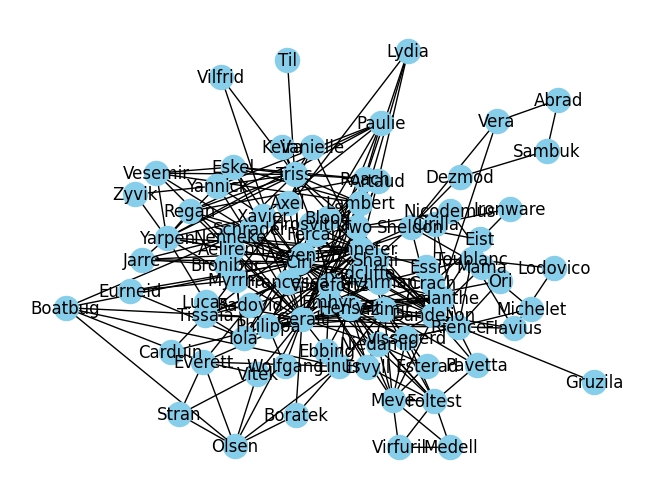

<Figure size 5000x5000 with 0 Axes>

In [39]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, 
        with_labels = True, 
        node_color = "skyblue", 
        edge_cmap = plt.cm.Blues, 
        pos = pos)

plt.figure(figsize=(50,50))
plt.show()

### Graph Visualization with Pyvis

In [40]:
net = Network(height = "800px", 
              width = "1000px", 
              bgcolor = "#222222", 
              font_color = "white", 
              notebook = True)

# We can barely see the characters on the node. One way to get around that and also get a more stuning visualization is to set the nodes size based on their degree. 
# Degree being the number of target nodes projected from a single node.
node_degree = dict(G.degree)

nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcherViz.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### **Analyzing the most important characters in The Witcher**

One way to understand characters' importance is by measuring through which character (node) can we reach the most other characters (nodes). These central characters act as a bridge to other characters, and there by hold more influence among the spread of nodes with less bridge to form. This is dubbed **The Degree Centrality Method**

In [41]:
degree_dict = nx.degree_centrality(G)

In [42]:
degree_dict

{'Aevenien': 0.03529411764705882,
 'Ciri': 0.4235294117647059,
 'Geralt': 0.4,
 'Radcliffe': 0.058823529411764705,
 'Dandelion': 0.21176470588235294,
 'Yennefer': 0.3176470588235294,
 'Cirilla': 0.047058823529411764,
 'Sheldon': 0.09411764705882353,
 'Two': 0.1411764705882353,
 'Vera': 0.03529411764705882,
 'Pavetta': 0.047058823529411764,
 'Calanthe': 0.11764705882352941,
 'Ironware': 0.023529411764705882,
 'Eist': 0.047058823529411764,
 'Dezmod': 0.023529411764705882,
 'Sambuk': 0.023529411764705882,
 'Abrad': 0.023529411764705882,
 'Mama': 0.023529411764705882,
 'Rience': 0.18823529411764706,
 'Gruzila': 0.011764705882352941,
 'Niedamir': 0.08235294117647059,
 'Vizimir': 0.2,
 'Roach': 0.08235294117647059,
 'Eskel': 0.07058823529411765,
 'Vesemir': 0.07058823529411765,
 'Triss': 0.18823529411764706,
 'Lambert': 0.09411764705882353,
 'Til': 0.011764705882352941,
 'Nenneke': 0.10588235294117647,
 'Vanielle': 0.03529411764705882,
 'Axel': 0.023529411764705882,
 'Fercart': 0.08235294117

In [43]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality']).sort_values('centrality', ascending = False)

In [44]:
degree_df.head(20)

,centrality
Ciri,0.423529
Geralt,0.400000
Yennefer,0.317647
Dandelion,0.211765
Vizimir,0.200000
Rience,0.188235
Triss,0.188235
Yarpen,0.152941
Vilgefortz,0.141176
Henselt,0.141176


<AxesSubplot: >

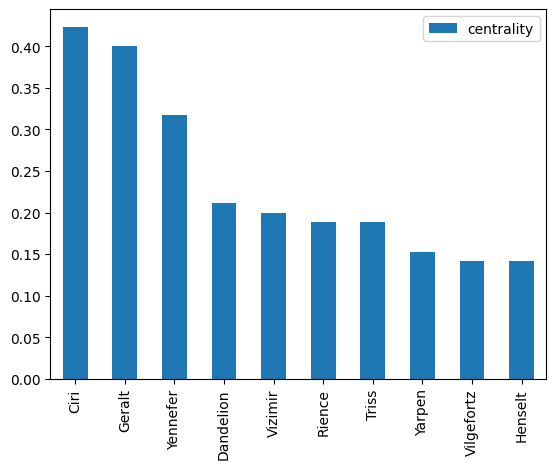

In [45]:
# Plotting the first ten "important" characters based on degree of centrality
degree_df[:10].plot(kind="bar")

Another character importance/centrality measure is the **Betweeness Centrality**, where the shortest path between each pair of nodes is calculated. The node that has more weight, meaning the node that is involved the shortest path to each pair of nodes tends to be more influential.

In [46]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality']).sort_values('centrality', ascending=False)

In [47]:
betweenness_df.head(10)

,centrality
Ciri,0.264517
Geralt,0.259030
Yennefer,0.166295
Dandelion,0.120009
Rience,0.089646
Vizimir,0.072275
Sheldon,0.058098
Triss,0.056042
Two,0.051841
Philippa,0.040933


<AxesSubplot: >

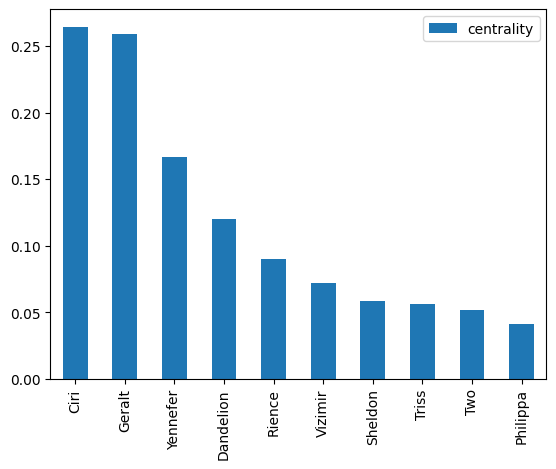

In [48]:
# Plotting the first ten "important" characters based on Betweenness Centrality
betweenness_df[:10].plot(kind="bar")

Similar centrality measure is seen here, despite the downscaled level of importance and order of importance among different characters.

And yet another centrality measure is the **Closeness Centrality**. In our context, it measures how close each character is with every other character. Hence, the character with the highest Closeness measure takes presedence in the centrality schema. While estimating centrality using this procedure, every node competes for a higher value of the reciprocal of the sum of the shortest path it has with everyother node.

In [49]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality']).sort_values('centrality', ascending=False)

<AxesSubplot: >

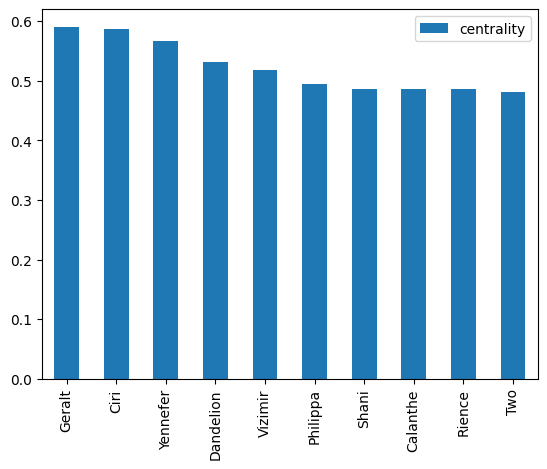

In [50]:
# Plotting the top ten "important" characters based on the Closeness Centrality
closeness_df[:10].plot(kind="bar")

Importance among characters tends to narrow down as the level of influence characters compose lies in a similar spectrum. This could suggest our networks dense structure.

A graphical illustration of the three different centrality measures can prove to be insightful.

In [51]:
# Saving centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### **Community Detection**

In [52]:
communities = community_louvain.best_partition(G)

In [53]:
communities

{'Aevenien': 0,
 'Ciri': 0,
 'Geralt': 1,
 'Radcliffe': 3,
 'Dandelion': 3,
 'Yennefer': 0,
 'Cirilla': 3,
 'Sheldon': 3,
 'Two': 4,
 'Vera': 3,
 'Pavetta': 2,
 'Calanthe': 2,
 'Ironware': 3,
 'Eist': 3,
 'Dezmod': 3,
 'Sambuk': 3,
 'Abrad': 3,
 'Mama': 3,
 'Rience': 4,
 'Gruzila': 4,
 'Niedamir': 2,
 'Vizimir': 2,
 'Roach': 0,
 'Eskel': 0,
 'Vesemir': 0,
 'Triss': 0,
 'Lambert': 0,
 'Til': 0,
 'Nenneke': 0,
 'Vanielle': 0,
 'Axel': 0,
 'Fercart': 4,
 'Keira': 0,
 'Vilgefortz': 4,
 'Artaud': 4,
 'Yarpen': 0,
 'Yannick': 0,
 'Xavier': 0,
 'Paulie': 0,
 'Regan': 0,
 'Lucas': 0,
 'Vilfrid': 0,
 'Henselt': 2,
 'Schrader': 0,
 'Zyvik': 0,
 'Aelirenn': 0,
 'Radovid': 1,
 'Everett': 1,
 'Iola': 0,
 'Boatbug': 1,
 'Linus': 1,
 'Boratek': 1,
 'Olsen': 1,
 'Stran': 1,
 'Vitek': 1,
 'Shani': 4,
 'Nicodemus': 4,
 'Ori': 4,
 'Philippa': 4,
 'Wolfgang': 1,
 'Foltest': 2,
 'Emhyr': 2,
 'Ebbing': 2,
 'Ervyll': 2,
 'Meve': 2,
 'Crach': 3,
 'Esterad': 2,
 'Vissegerd': 2,
 'Virfuril': 2,
 'Medell': 2,
 '

In [54]:
nx.set_node_attributes(G, communities, 'group')

### PyVis visualization of the Community Detection

In [55]:
com_network = Network(notebook = True, 
                  width = "1000px",
                  height = "800px",
                  bgcolor = "#222222",
                  font_color = "white")

com_network.from_nx(G)
com_network.show("witcherCommunities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


This graphical representation proves to be essential in that it provides a rich information about the community among which each character belongs to in conjunction with the level of importance each possess among their respective circles.

### Catagorizing characters by their community to later extract information about which individual is the most important in his/her community.

In [56]:
# Identifying number of communities
set(communities.values())

{0, 1, 2, 3, 4}

In [57]:
# Catagorizing characters to their respective communities

com0, com1, com2, com3, com4 = [] ,[], [], [], []

for key, value in communities.items():
    if value == 0:
         com0.append(key)
    elif value == 1:
        com1.append(key)
    elif value == 2:
        com2.append(key)
    elif value == 3:
        com3.append(key)
    else:
        com4.append(key)
        
community_grouped = {"Community 0" : com0, "Community 1" : com1, "Community 2" : com2, "Community 3" : com3, "Community 4" : com4}

In [58]:
community_grouped

{'Community 0': ['Aevenien',
  'Ciri',
  'Yennefer',
  'Roach',
  'Eskel',
  'Vesemir',
  'Triss',
  'Lambert',
  'Til',
  'Nenneke',
  'Vanielle',
  'Axel',
  'Keira',
  'Yarpen',
  'Yannick',
  'Xavier',
  'Paulie',
  'Regan',
  'Lucas',
  'Vilfrid',
  'Schrader',
  'Zyvik',
  'Aelirenn',
  'Iola',
  'Eurneid',
  'Jarre',
  'Bronibor',
  'Hrosvitha',
  'Myrrha',
  'Blood'],
 'Community 1': ['Geralt',
  'Radovid',
  'Everett',
  'Boatbug',
  'Linus',
  'Boratek',
  'Olsen',
  'Stran',
  'Vitek',
  'Wolfgang'],
 'Community 2': ['Pavetta',
  'Calanthe',
  'Niedamir',
  'Vizimir',
  'Henselt',
  'Foltest',
  'Emhyr',
  'Ebbing',
  'Ervyll',
  'Meve',
  'Esterad',
  'Vissegerd',
  'Virfuril',
  'Medell'],
 'Community 3': ['Radcliffe',
  'Dandelion',
  'Cirilla',
  'Sheldon',
  'Vera',
  'Ironware',
  'Eist',
  'Dezmod',
  'Sambuk',
  'Abrad',
  'Mama',
  'Crach',
  'Essi'],
 'Community 4': ['Two',
  'Rience',
  'Gruzila',
  'Fercart',
  'Vilgefortz',
  'Artaud',
  'Shani',
  'Nicodemus',


In [59]:
# Evaluating degree of characters' importance
def degree_of_importance(community):
    importance = 0

    for i in community_grouped[community]:
        importance = max(importance, degree_dict[i])
    character = degree_df[degree_df.centrality==importance].index[0]
    
    return character

#### The top 5 most important characters (in their respective communities) are as follows:

In [60]:
community0 = degree_of_importance('Community 0')
community1 = degree_of_importance('Community 1')
community2 = degree_of_importance('Community 2')
community3 = degree_of_importance('Community 3')
community4 = degree_of_importance('Community 4')

In [61]:
most_important_characters = [{'Community 0' : community0, 'Community 1' : community1, 'Community 2' : community2, 'Community 3' : community3, 'Community 4' : community4}]

In [62]:
most_important_characters

[{'Community 0': 'Ciri',
  'Community 1': 'Geralt',
  'Community 2': 'Vizimir',
  'Community 3': 'Dandelion',
  'Community 4': 'Rience'}]